## 환율 데이터 가져오기

- 한국은행 API 사용

- 한국->미국(달러), 한국->일본(엔), 한국->유럽(유로), 한국->중국(위안) 기준

In [41]:
import json
from urllib.request import urlopen
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")
sns.set_style('whitegrid')

f = open('api_key.txt', 'r')
api_key = f.readline()
f.close()

key=api_key
nara=['0000001','0000002','0000003','0000053']   # 나라 코드(0000001:us, 0000002:jp, 0000003:eu, 0000053:cn)
url=["http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/100000/036Y001/DD/20180401/date/0000001/?/?/",  # 환율
    "http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/100000/098Y001/MM/20190401/date/0101000/?/?/",   # 기준금리
    "http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/100000/022Y013/MM/20190401/date/000000/?/?/",    # 경상수지
    ]    

s_data=pd.DataFrame()
time=[]
us=[]
jp=[]
eu=[]
cn=[]

for i in range(len(nara)):
    data=json.loads(urlopen(url[0][:-12]+nara[i]+url[0][-5:]).read())
    data2=data['StatisticSearch']['row']
    
    for k in range(len(data2)):        
        if nara[i]==nara[0]:
            us.append(float(data2[k]['DATA_VALUE']))
            time.append(int(data2[k]['TIME']))
        elif nara[i]==nara[1]:
            jp.append(float(data2[k]['DATA_VALUE']))
        elif nara[i]==nara[2]:
            eu.append(float(data2[k]['DATA_VALUE']))
        else :
            cn.append(float(data2[k]['DATA_VALUE']))

s_data['time']=time
s_data['us']=us
s_data['jp']=jp
s_data['eu']=eu
s_data['cn']=cn
s_data['time']=pd.to_datetime(s_data.time.apply(lambda x: str(x)))

print(s_data)

          time      us       jp       eu      cn
0   2018-04-02  1064.4  1000.80  1311.07  169.80
1   2018-04-03  1058.1   999.67  1301.73  168.83
2   2018-04-04  1057.8   992.82  1298.08  168.60
3   2018-04-05  1057.6   990.68  1299.31  168.26
4   2018-04-06  1059.5   989.03  1297.41  168.56
..         ...     ...      ...      ...     ...
831 2021-08-10  1145.0  1037.84  1343.71  176.78
832 2021-08-11  1148.5  1038.76  1346.04  177.15
833 2021-08-12  1155.0  1045.96  1355.97  178.03
834 2021-08-13  1158.9  1049.82  1360.32  178.82
835 2021-08-17  1167.8  1068.97  1375.67  180.19

[836 rows x 5 columns]


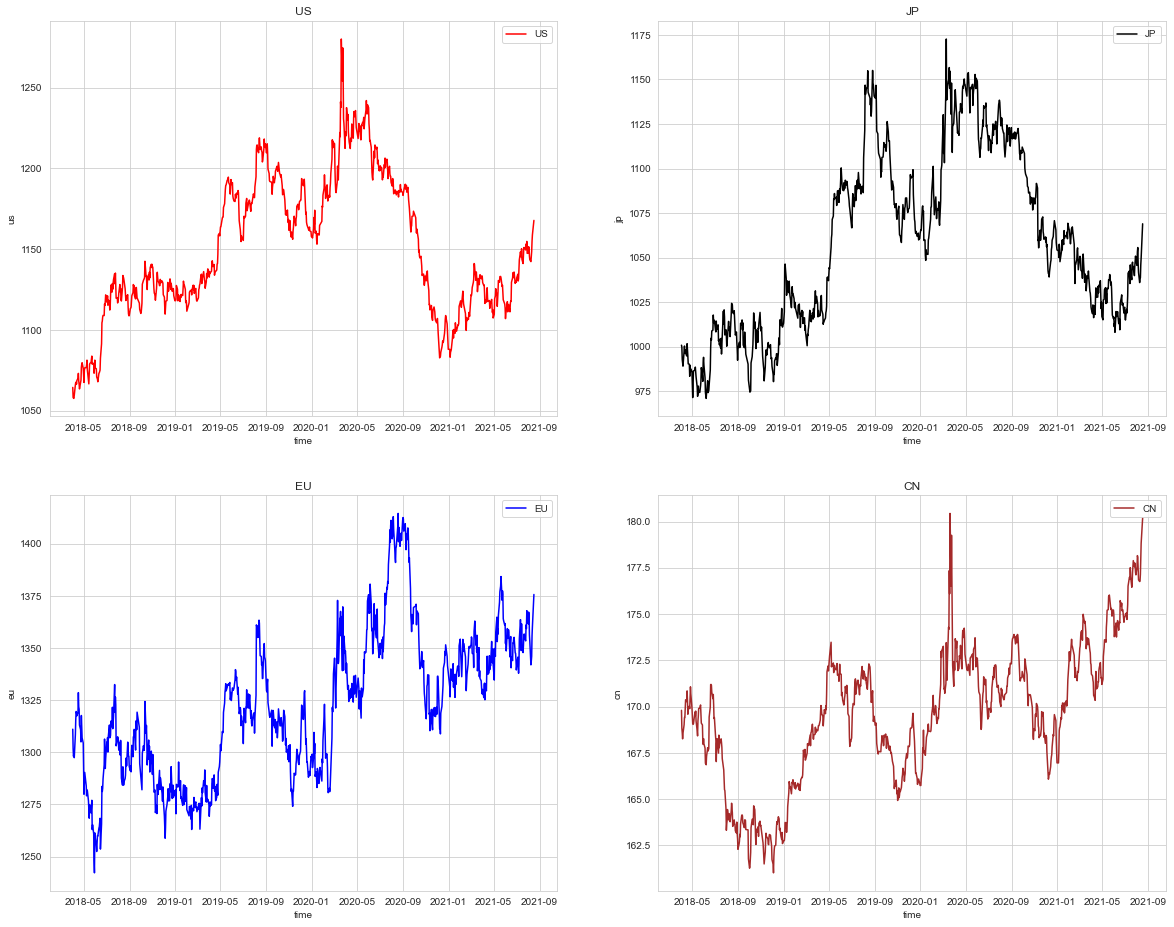

In [42]:
f, ax = plt.subplots(2,2,figsize = (20,16))

sns.lineplot(data = s_data, x = 'time', y = 'us', 
             color = 'red', 
             label = 'US',
             ax = ax[0,0]).set_title('US')
             
sns.lineplot(data = s_data, x = 'time', y = 'jp',
             color = 'black',
             label = 'JP',
             ax = ax[0,1]).set_title('JP')
             
sns.lineplot(data = s_data, x = 'time', y = 'eu', 
             color = 'blue',
             ax = ax[1,0],
             label = 'EU').set_title('EU')
             
sns.lineplot(data = s_data, x = 'time', y = 'cn',
             color = 'brown',
             label = 'CN',
             ax = ax[1,1]).set_title('CN')

plt.legend()
plt.show()

In [43]:
corr = s_data.corr()
corr


,us,jp,eu,cn
us,1.000000,0.872745,0.412238,0.318751
jp,0.872745,1.000000,0.603342,0.417046
eu,0.412238,0.603342,1.000000,0.679950
cn,0.318751,0.417046,0.679950,1.000000


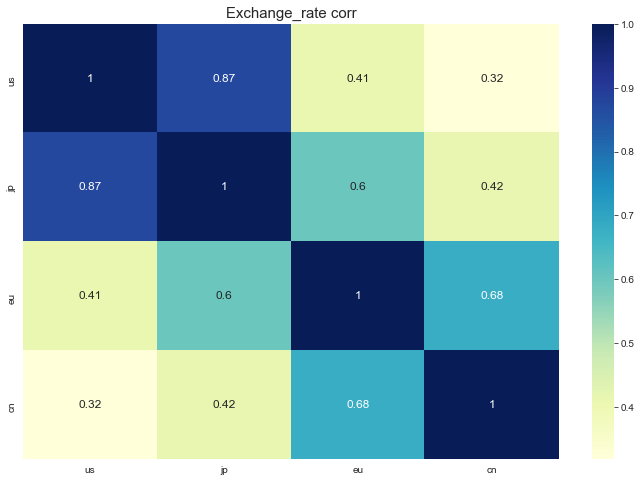

In [44]:
f, ax = plt.subplots(figsize = (12,8))

sns.heatmap(corr, 
            cmap ='YlGnBu',
            annot = True, annot_kws = {"fontsize":12}).set_title('Exchange_rate corr', fontsize = 15)

plt.show()

- 생각보다 US와 JP가 상관성이 높다.
- CN과 EU 역시 0.68로 상관성이 높아보인다. 다른 조합은 상관성 측면에서 서로 영향이 적다.

In [45]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset


s_ts = to_time_series_dataset(s_data.iloc[:,1:])

model = TimeSeriesKMeans(n_clusters=3, metric = 'softdtw', max_iter=10)
model.fit(s_ts)

model.cluster_centers_.shape

(3, 4, 1)

In [46]:
model.predict(s_ts)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,